In [148]:
# Rodrigo Caye Daudt
# rodrigo.cayedaudt@geod.baug.ethz.ch
# 02/2021

import numpy as np
from skimage import io
from skimage import transform
%matplotlib inline
import matplotlib.pyplot as plt
import os


import utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
if not os.path.exists('./outputs'):
    os.mkdir('./outputs')

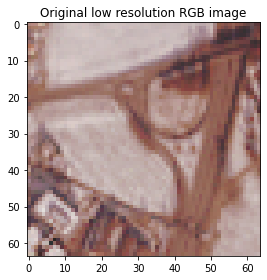

In [157]:
# Import images

# Images should be scaled to the range [0,1] for color space transformations
img_r = np.array(io.imread('data/po_163003_red_0000000_8bit.tif'), dtype=float) / 255
img_g = np.array(io.imread('data/po_163003_grn_0000000_8bit.tif'), dtype=float) / 255
img_b = np.array(io.imread('data/po_163003_blu_0000000_8bit.tif'), dtype=float) / 255

img_pan = np.array(io.imread('data/po_163003_pan_0000000_8bit.tif'), dtype=float) / 255

# Use this to quickly test using a subsection of the image
PROTOTYPE = True
if PROTOTYPE:
    a, b, s = 1500, 2000, 64 # offset, offset, size for cropping
    img_r = img_r[a:a+s, b:b+s]
    img_g = img_g[a:a+s, b:b+s]
    img_b = img_b[a:a+s, b:b+s]
    img_pan = img_pan[4*a:4*a+4*s, 4*b:4*b+4*s]

# Stack layers to form a single RGB image
# Tip: you will need to do this yourself later
img_rgb = np.stack((img_r, img_g, img_b), 2)

del(img_r, img_g, img_b) # helps avoid memory issues when processing the full image

if PROTOTYPE: # Displaying the full images consumes too much memory
    plt.figure()
    plt.title('Original low resolution RGB image')
    io.imshow(img_rgb)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


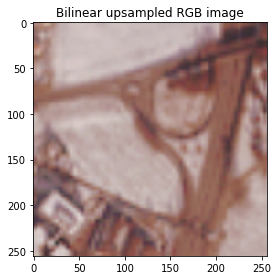

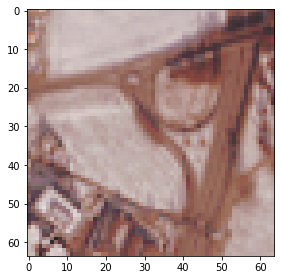

In [158]:
# Bilinear upsampling

# Upsample the RGB image using bilinear interpolation so that the spacial resolution matches that of the panchromatic channel
# Look into (skimage.)transform.resize to perform this operation
img_rgb_upsampled = transform.resize(image=img_rgb, output_shape=img_pan.shape)
io.imsave('outputs/01-bilinear_upsampling.png', img_rgb_upsampled)

if PROTOTYPE:
    plt.figure()
    plt.title('Bilinear upsampled RGB image')
    io.imshow(img_rgb_upsampled)
    plt.figure()
    io.imshow(img_rgb)

In [159]:
# IHS Pansharpening


# Convert image from RGB to IHS (intensity, hue, saturation)

# You must program this function in utils.py
img_ihs_upsampled = utils.rgb2ihs(img_rgb_upsampled)

# Replace intensity channel with panchromatic image
img_ihs_pansharpened = np.stack((img_pan, img_ihs_upsampled[:, :, 1], img_ihs_upsampled[:, :, 2]), 2)


del(img_ihs_upsampled) # helps avoid memory issues when processing the full image

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


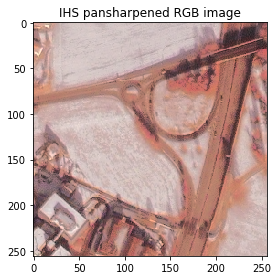

In [168]:

# Convert result back into RGB
img_rgb_pansharpened = utils.ihs2rgb(img_ihs_pansharpened)
if PROTOTYPE:
    plt.figure()
    plt.title('IHS pansharpened RGB image')
    io.imshow(img_rgb_pansharpened)
io.imsave('outputs/02-IHS-pansharpening.png', img_rgb_pansharpened)
del(img_rgb_pansharpened) # helps avoid memory issues when processing the full image


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


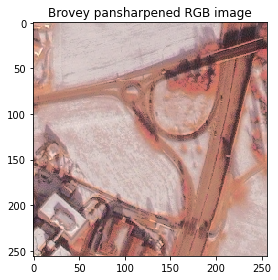

In [164]:
# Brovey pansharpening


# This operation does not require a color space transformation.
# Fill in the code for the Brovey pansharpening in utils.py
img_rgb_brovey = utils.brovey_pansharpening(img_rgb_upsampled, img_pan)
if PROTOTYPE:
    plt.figure()
    plt.title('Brovey pansharpened RGB image')
    io.imshow(img_rgb_brovey)
io.imsave('outputs/03-brovey_pansharpening.png', img_rgb_brovey)
del(img_rgb_brovey) # helps avoid memory issues when processing the full image